In [1]:
import ocean_ic_processing as oip

In [11]:
import xarray as xr
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [7]:
def plot_map_orcagrid(data,lat,lon,title="",cbar_lab="",vmin=False,vmax=False):
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
    ax.set_global()

    if vmin == False:
        mesh = ax.pcolormesh(lon,lat,data,transform=ccrs.PlateCarree())
    else:
        mesh = ax.pcolormesh(lon,lat,data,transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax)
    ax.coastlines()
    ax.gridlines()
    plt.colorbar(mesh, orientation='horizontal',shrink=0.75,label=cbar_lab)
    plt.title(title)
    plt.show()

In [2]:
year = 1925
scratch_dir = 'test_data'
hindcast_dir = 'test_data'
half_output_dir = 'test_data/test_output'
doub_output_dir = 'test_data/test_output'
perm_dir = 'test_data'

In [3]:
oip.regrid_and_process(year, scratch_dir, hindcast_dir, half_output_dir, doub_output_dir, perm_dir,horz_griddes='test_data/orca1_griddes.txt')

/usr/local/apps/python3/3.11.8-01/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


interation 1 max diff: 1.2369820664549707
interation 2 max diff: 0.0005679301314103213
interation 3 max diff: 2.2555013856617734e-08
interation 4 max diff: 1.1368683772161603e-12
interation 1 max diff: 1.442669690784669
interation 2 max diff: 0.0007402054757221777
interation 3 max diff: 2.3507709556724876e-08
interation 4 max diff: 1.2505552149377763e-12


In [9]:
halfPert = xr.open_dataset(f"{half_output_dir}/{str(year)}_halfPert.nc")
doubPert = xr.open_dataset(f"{half_output_dir}/{str(year)}_doubPert.nc")
cera = xr.open_dataset(f"{scratch_dir}/cera_{str(year)}.nc")

In [6]:
halfPert

<xarray.Dataset> Size: 509MB
Dimensions:       (y: 292, x: 362, z: 42, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/56)
    nav_lon       (y, x) float32 423kB ...
    nav_lat       (y, x) float32 423kB ...
    nav_lev       (z) float32 168B ...
    time_counter  (t) float64 8B ...
    kt            float64 8B ...
    ndastp        float64 8B ...
    ...            ...
    fwb_ssh0      float64 8B ...
    fwb_ssh00     float64 8B ...
    fwb_hst0      float64 8B ...
    fwb_hst00     float64 8B ...
    fwb_hbp0      float64 8B ...
    fwb_hbp00     float64 8B ...

In [8]:
doubPert

<xarray.Dataset> Size: 509MB
Dimensions:       (y: 292, x: 362, z: 42, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/56)
    nav_lon       (y, x) float32 423kB ...
    nav_lat       (y, x) float32 423kB ...
    nav_lev       (z) float32 168B ...
    time_counter  (t) float64 8B ...
    kt            float64 8B ...
    ndastp        float64 8B ...
    ...            ...
    fwb_ssh0      float64 8B ...
    fwb_ssh00     float64 8B ...
    fwb_hst0      float64 8B ...
    fwb_hst00     float64 8B ...
    fwb_hbp0      float64 8B ...
    fwb_hbp00     float64 8B ...

In [10]:
cera

<xarray.Dataset> Size: 509MB
Dimensions:       (y: 292, x: 362, z: 42, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/56)
    nav_lon       (y, x) float32 423kB ...
    nav_lat       (y, x) float32 423kB ...
    nav_lev       (z) float32 168B ...
    time_counter  (t) float64 8B ...
    kt            float64 8B ...
    ndastp        float64 8B ...
    ...            ...
    fwb_ssh0      float64 8B ...
    fwb_ssh00     float64 8B ...
    fwb_hst0      float64 8B ...
    fwb_hst00     float64 8B ...
    fwb_hbp0      float64 8B ...
    fwb_hbp00     float64 8B ...

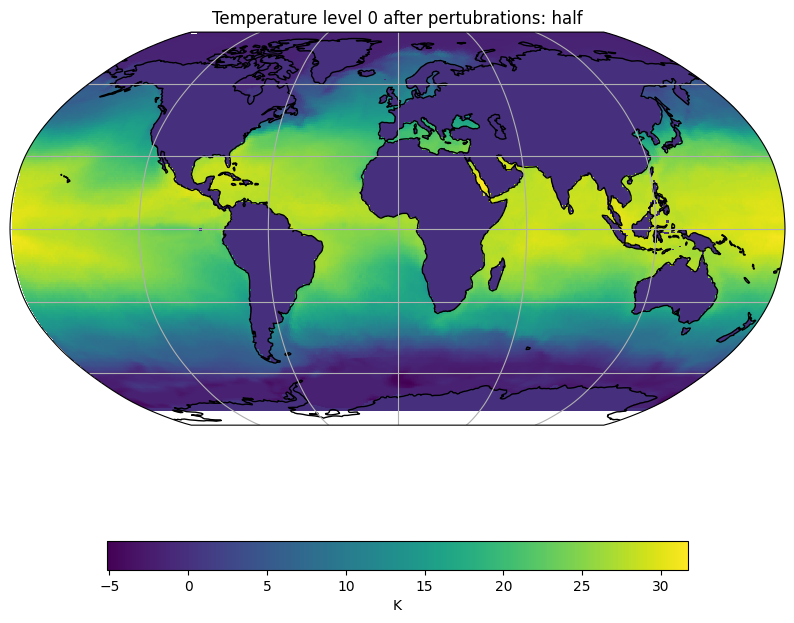

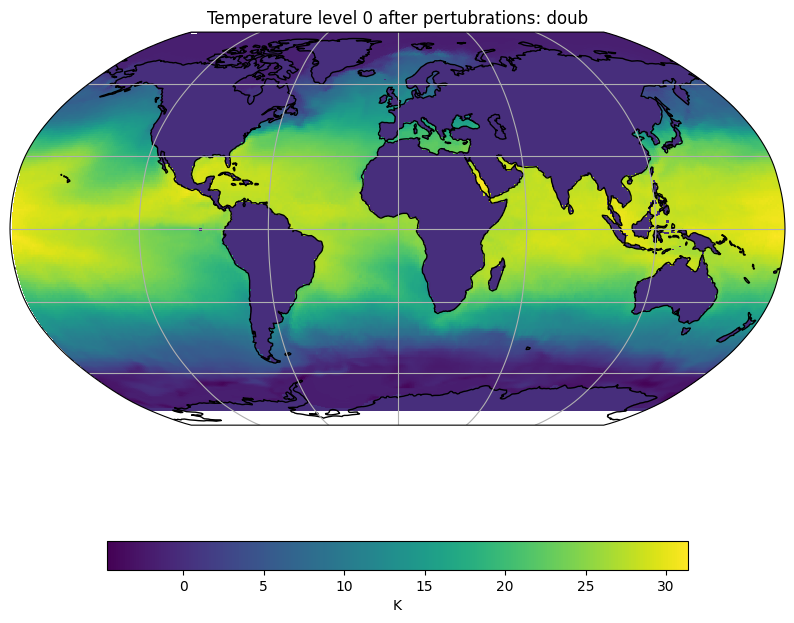

In [15]:
plot_map_orcagrid(halfPert.tn[0,0,:,:],halfPert.nav_lat,halfPert.nav_lon,"Temperature level 0 after pertubrations: half","K")
plot_map_orcagrid(doubPert.tn[0,0,:,:],doubPert.nav_lat,doubPert.nav_lon,"Temperature level 0 after pertubrations: doub","K")

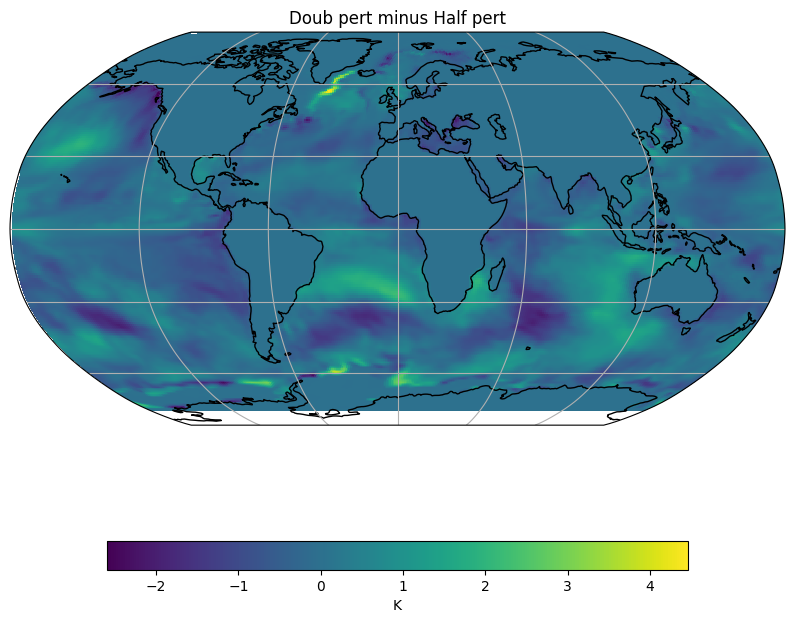

In [17]:
#plot doub minus half
data = doubPert.tn[0,0,:,:] - halfPert.tn[0,0,:,:]
lat = doubPert.nav_lat
lon  = doubPert.nav_lon

plot_map_orcagrid(data,lat,lon,"Doub pert minus Half pert","K")

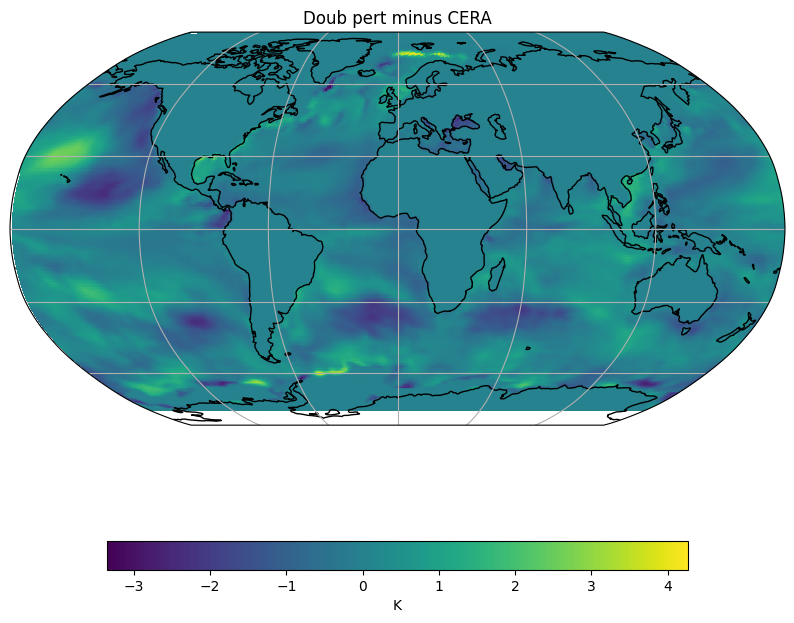

In [18]:
#plot doub minus CERA
data = doubPert.tn[0,0,:,:] - cera.tn[0,0,:,:]
lat = doubPert.nav_lat
lon  = doubPert.nav_lon

plot_map_orcagrid(data,lat,lon,"Doub pert minus CERA","K")

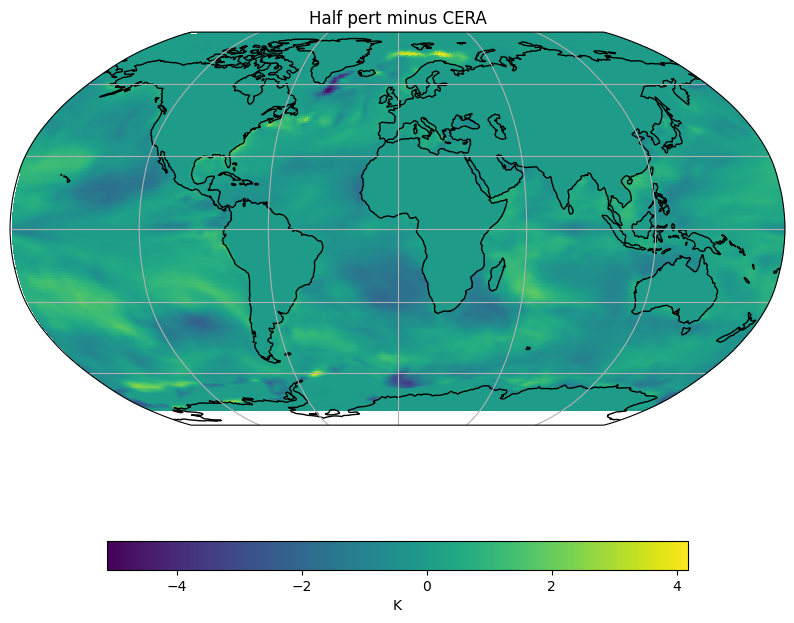

In [19]:
#plot half minus CERA
data = halfPert.tn[0,0,:,:] - cera.tn[0,0,:,:]
lat = doubPert.nav_lat
lon  = doubPert.nav_lon

plot_map_orcagrid(data,lat,lon,"Half pert minus CERA","K")